In [50]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms import *
from time import perf_counter

# Quadrics

# zero places 

In [21]:
# Polynomials
test_functions = {
        'Pol $x=0.23$': (lambda x: (x - 0.23) * (x + 1) * (x + 2) * (x + 3) * (x + 4), 0.23),
        'Pol $x=0.53$': (lambda x: (x - 0.53) * (x + 1) * (x + 2) * (x + 3) *  (x + 4), 0.53)
    }
test_function_df = {
        'Pol: $x=0.23$': lambda x: 5 * (2.5 + 16.78 * x + 19.62 * x**2 + 7.816 * x**3 + x**4),
        'Pol: $x=0.53$': lambda x: 5 * (-0.5 + 12.58 * x + 17.82 * x**2 + 7.576 * x ** 3 + x ** 4)
    }
    
zero_methods = {
    'Bisection method': bisection_method,
    'Falsi method': falsi_method,
    'Newton-Raphson method': newton_raphson_method,
    'Secant method': secant_method
}

In [46]:

id_start = 2
# error rising through iterations 
def error_rising_zero(a, b, n):
    # default values for functions
    accuracy = None 
    z0 = b - (b-a)/10
    z1 = b
    # Store error for plotting:
    function_errors = {name: None for name in test_functions}
    for f, f_name, df in zip(test_functions.values(), test_functions ,test_function_df.values()):
        # empty first values (for rescaling)
        temp_list = [None for _ in range(id_start)] 
        # creating dict for function 
        errors = {name: [*temp_list] for name in zero_methods}
        # getting true x_0 value
        true_val = f[1]
        f=f[0]
        # creating loop for amount of iteration
        for i in range(id_start, n+1):
            # bisection method 
            emp_val = bisection_method(f, a=a, b=b, acc=accuracy, n=i)
            err = abs(true_val - emp_val)
            errors['Bisection method'].append(err)
            
            # falsi_method
            emp_val = falsi_method(f, a, b, accuracy, i)
            err = abs(true_val - emp_val)
            errors['Falsi method'].append(err)
            
            # Newton-Raphson Method
            emp_val = newton_raphson_method(f, df, z1, i)
            err = abs(true_val - emp_val)
            errors['Newton-Raphson method'].append(err)
            
            # secant method
            emp_val = secant_method(f, z1, z0, i)
            err = abs(true_val - emp_val)
            errors['Secant method'].append(err)
        function_errors[f_name] = errors 
    return function_errors
    


# plots 
def plot_errors(errors, title, n):
    plt.figure(figsize=(10, 6))
    for method_name, error in errors.items():
        plt.plot(error, label=method_name)
    plt.yscale('log')  # Log scale for better visibility
    plt.xlabel('Iteracja')
    plt.ylabel('Błąd $|f(x_0) - f(x_n)|$')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.xlim(left=id_start, right=n)
    plt.show()

# go two times through function,

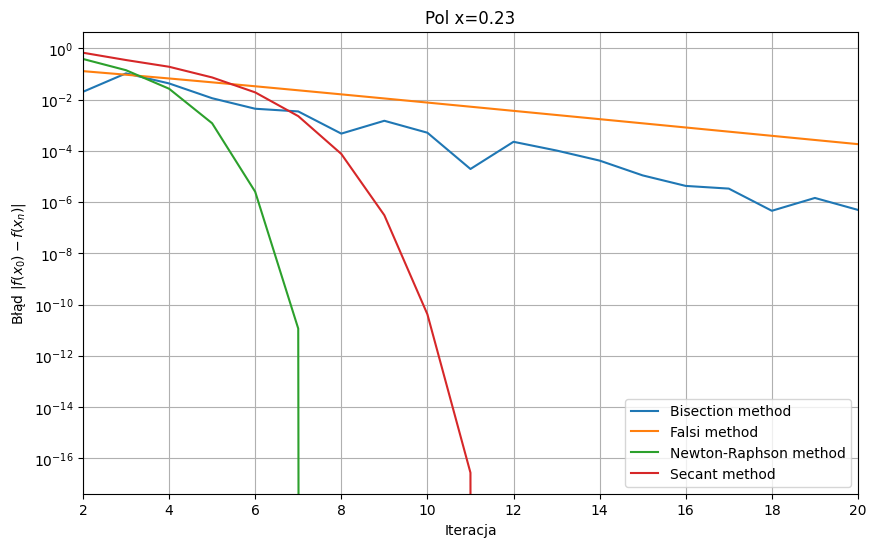

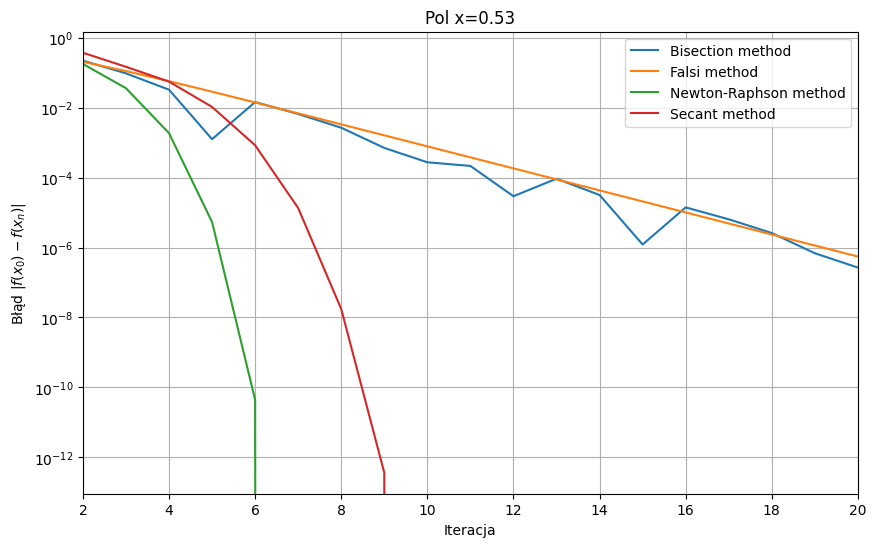

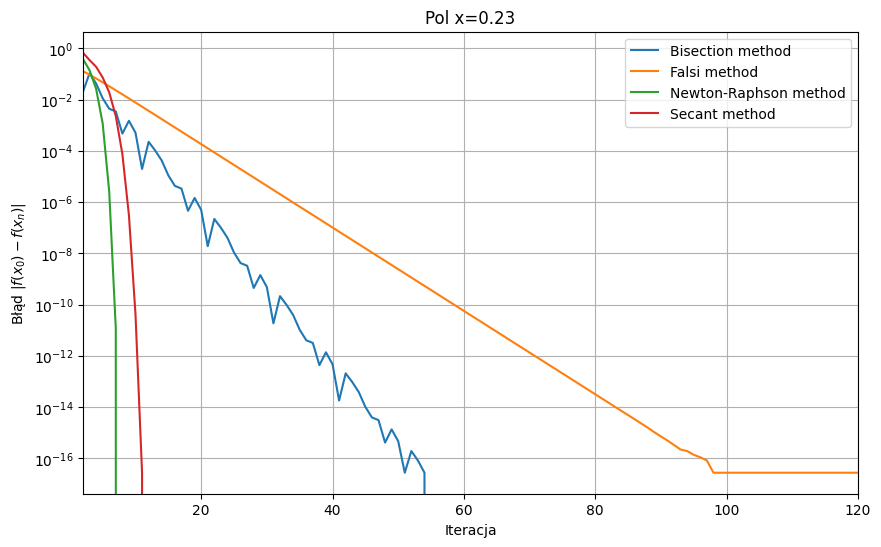

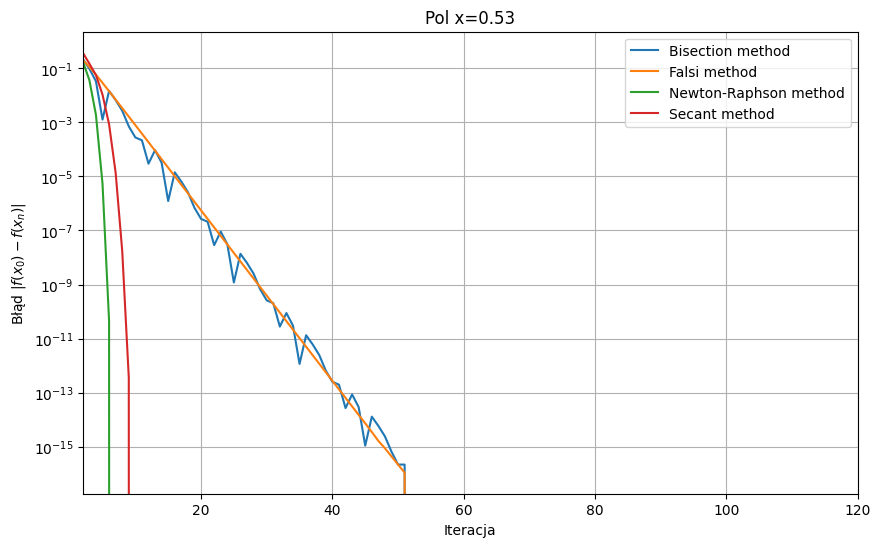

In [69]:
for n in [20, 120]:
    function_errors = error_rising_zero(0, 1, n)
    for name, errors in function_errors.items():
        plot_errors(errors, f'{name}', n)

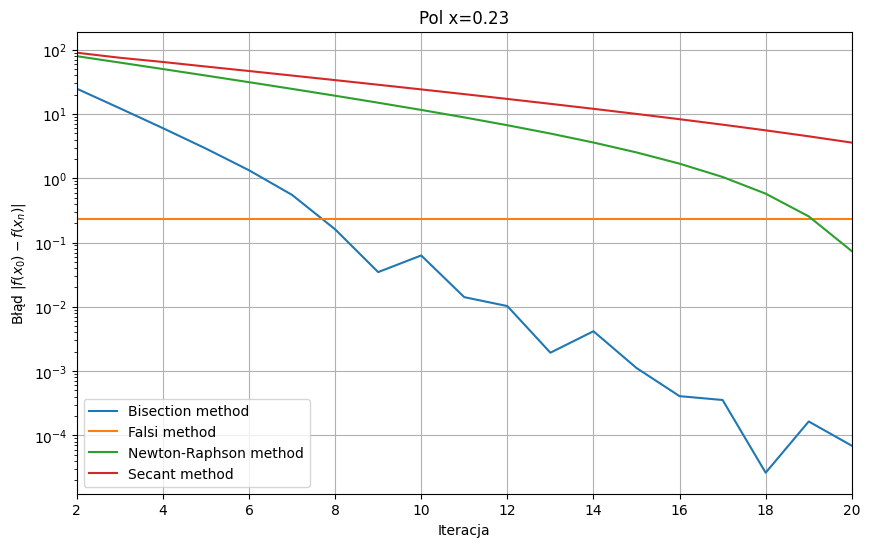

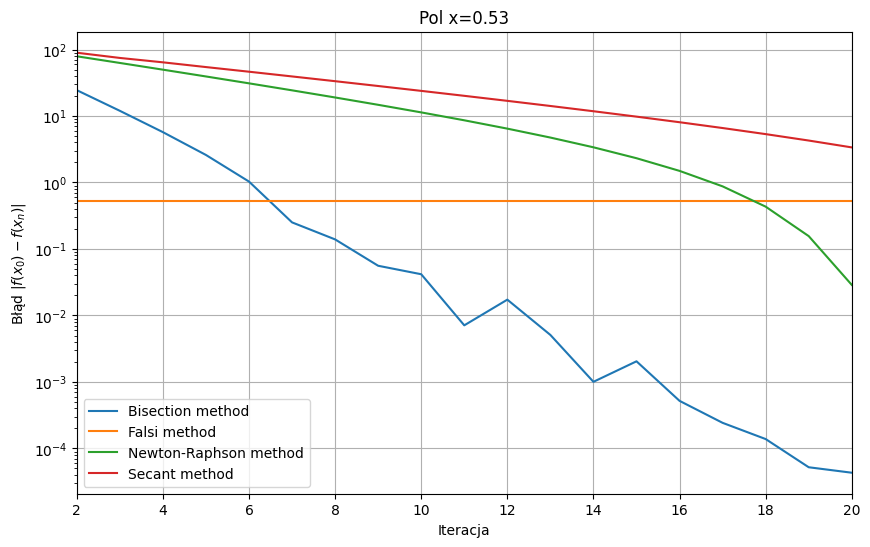

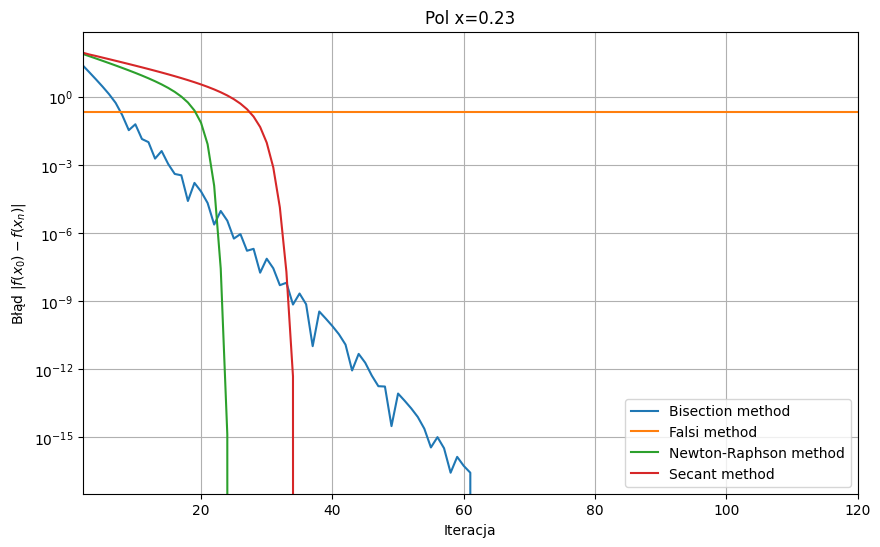

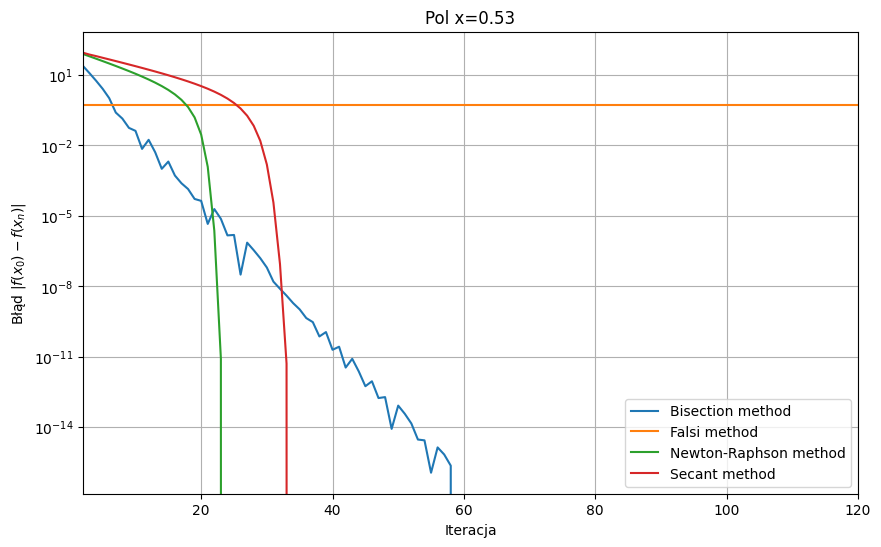

In [76]:
for n in [20, 120]:
    function_errors = error_rising_zero(0, 100, n)
    for name, errors in function_errors.items():
        plot_errors(errors, f'{name}', n)

In [63]:

id_start = 2


def accuracy_till_zero(a, b, n):
    # default values for functions
    iterations = 1000
    accuracy = None 
    z0 = b - (b-a)/10
    z1 = b
    # Store error for plotting:
    function_errors = {name: None for name in test_functions}
    for f, f_name, df in zip(test_functions.values(), test_functions ,test_function_df.values()):
        # empty first values (for rescaling)
        temp_list = [(None, None) for _ in range(id_start)] 
        # creating dict for function 
        errors = {name: [*temp_list] for name in zero_methods}
        # getting true x_0 value
        true_val = f[1]
        f=f[0]
        # loop creating errrs 
        for j in range(1, n+1):
            error = 10**-j
            # bisection method
            for i in range(id_start, iterations+1):
                tic = perf_counter()
                emp_val = bisection_method(f, a=a, b=b, acc=accuracy, n=i)
                tac = perf_counter()
                err = abs(true_val - emp_val)
                if err <= error:
                    time_elapsed = tac - tic
                    rtn_val = (i, time_elapsed)
                    errors['Bisection method'].append(rtn_val)
                    break 
                elif i == iterations:
                    rtn_val = (None, None)
                    errors['Bisection method'].append(rtn_val)

            # falsi_method
            for i in range(id_start, iterations+1):
                tic = perf_counter()
                emp_val = falsi_method(f, a, b, accuracy, i)
                tac = perf_counter()
                err = abs(true_val - emp_val)
                if err <= error:
                    time_elapsed = tac - tic
                    rtn_val = (i, time_elapsed)
                    errors['Falsi method'].append(rtn_val)
                    break 
                elif i == iterations:
                    rtn_val = (None, None)
                    errors['Falsi method'].append(rtn_val)
                    
            # Newton-Raphson Method
            for i in range(id_start, iterations+1):
                tic = perf_counter()
                emp_val = newton_raphson_method(f, df, z1, i)
                tac = perf_counter()
                err = abs(true_val - emp_val)
                if err <= error:
                    time_elapsed = tac - tic
                    rtn_val = (i, time_elapsed)
                    errors['Newton-Raphson method'].append(rtn_val)
                    break 
                elif i == iterations:
                    rtn_val = (None, None)
                    errors['Newton-Raphson method'].append(rtn_val)
            # secant method
            for i in range(id_start, iterations+1):
                tic = perf_counter()
                emp_val = secant_method(f, z1, z0, i)
                tac = perf_counter()
                err = abs(true_val - emp_val)
                if err <= error:
                    time_elapsed = tac - tic
                    rtn_val = (i, time_elapsed)
                    errors['Secant method'].append(rtn_val)
                    break
                elif i == iterations:
                    rtn_val = (None, None)
                    errors['Secant method'].append(rtn_val)
        function_errors[f_name] = errors
    return function_errors
    


# plots 
def plot_accuracy_till(errors, title, n):
    # names 
    x_label = '$|f(x_0) - f(x_n)|= 10^{-n}$'
    # time 
    plt.figure(figsize=(10, 6))
    for method_name, error in errors.items():
        plt.plot([i[1] for i in error], label=method_name)
    # plt.xscale('log')  # Log scale for better visibility
    plt.xlabel(x_label)
    plt.ylabel('Czas $s$')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.xlim(left=id_start, right=n)
    plt.show()
    
    # iteration 
    plt.figure(figsize=(10, 6))
    for method_name, error in errors.items():
        plt.plot([i[0] for i in error], label=method_name)
    # plt.xscale('log')  # Log scale for better visibility
    plt.xlabel(x_label)
    plt.ylabel('Iteracja $n$')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.xlim(left=id_start, right=n)
    plt.show()

# go two times through function

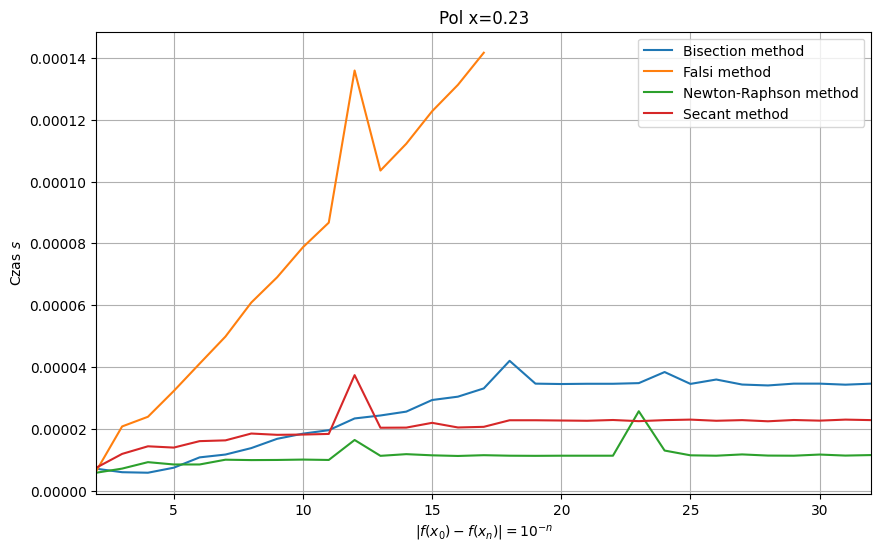

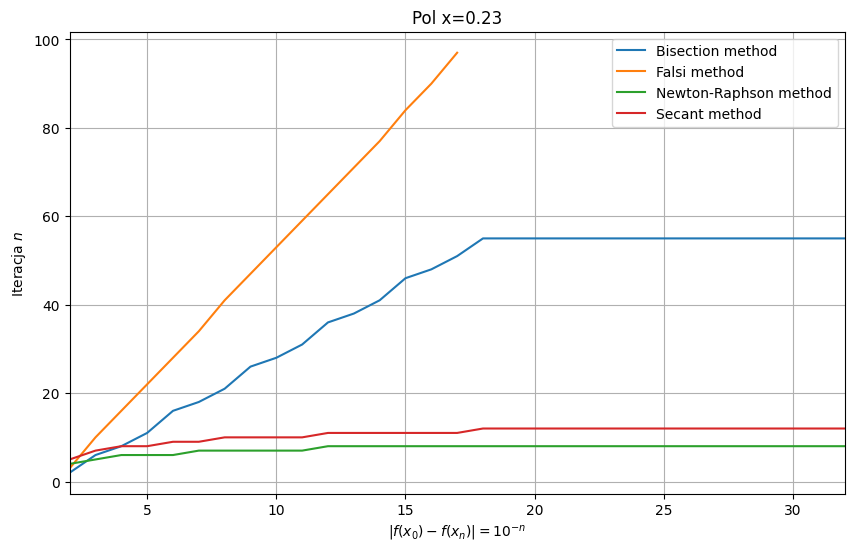

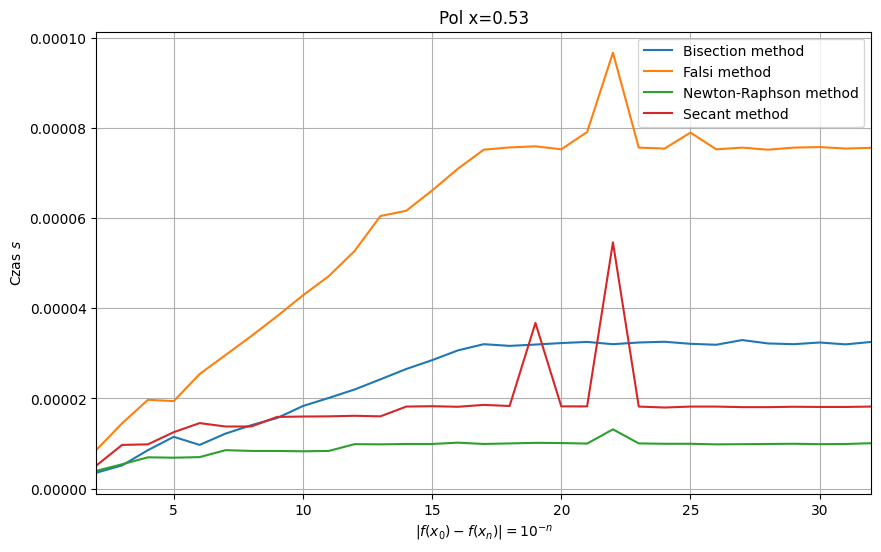

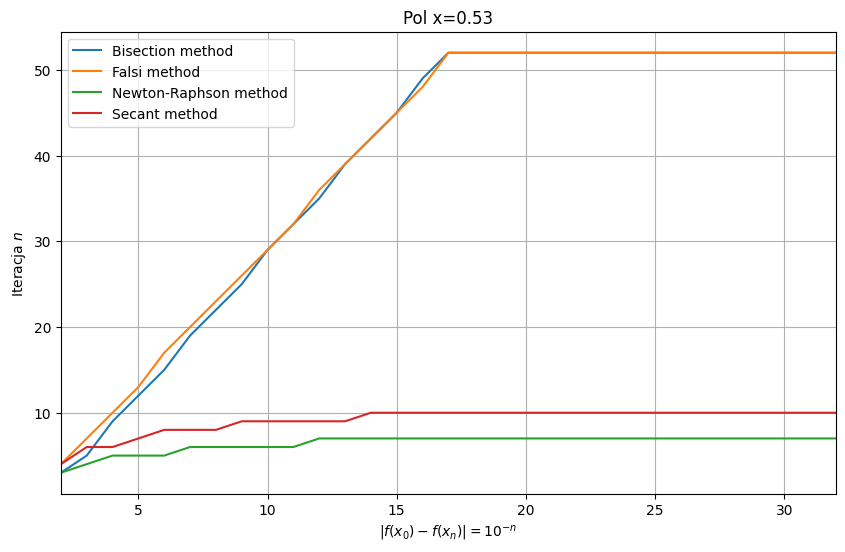

In [77]:
n = 32
errors = accuracy_till_zero(0, 1, n)
for name, errors in errors.items():
    plot_accuracy_till(errors, name, n)

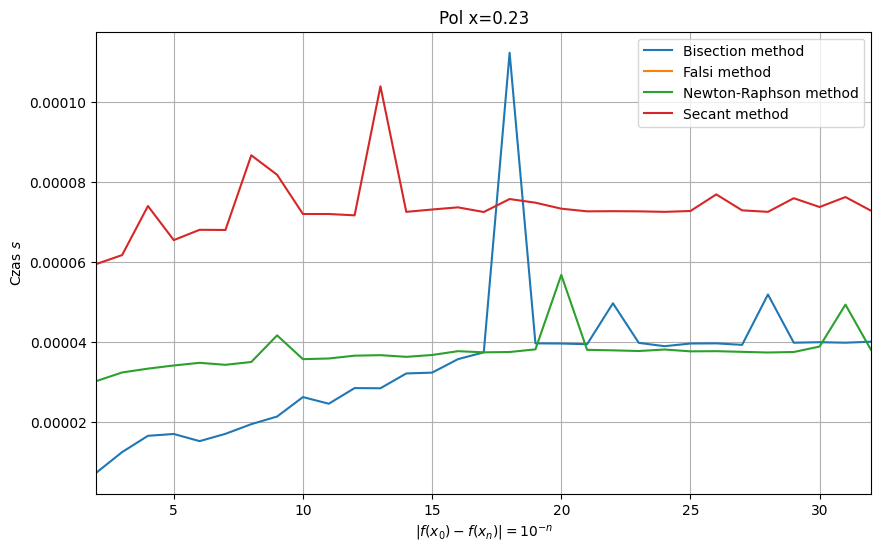

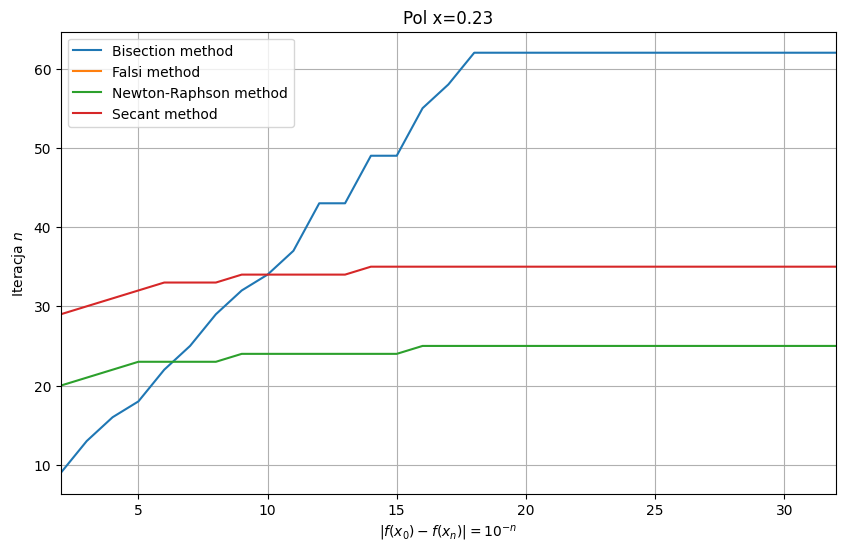

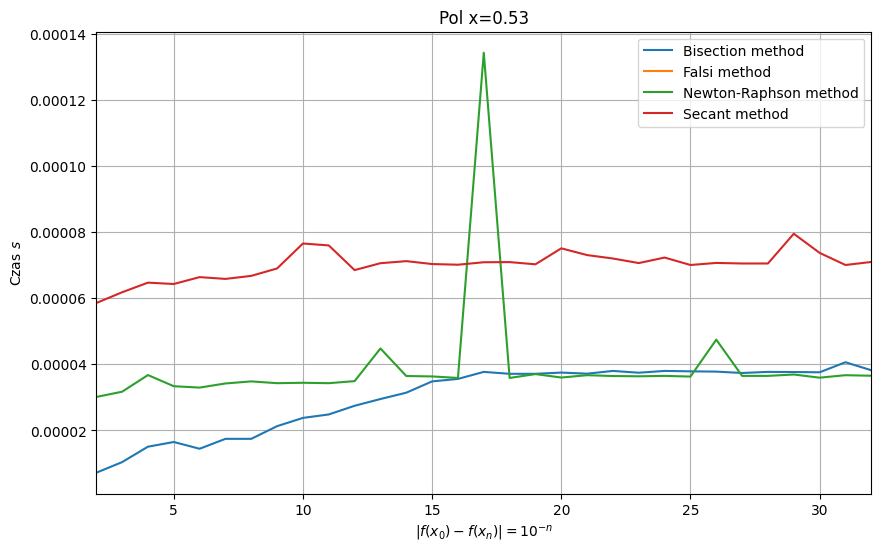

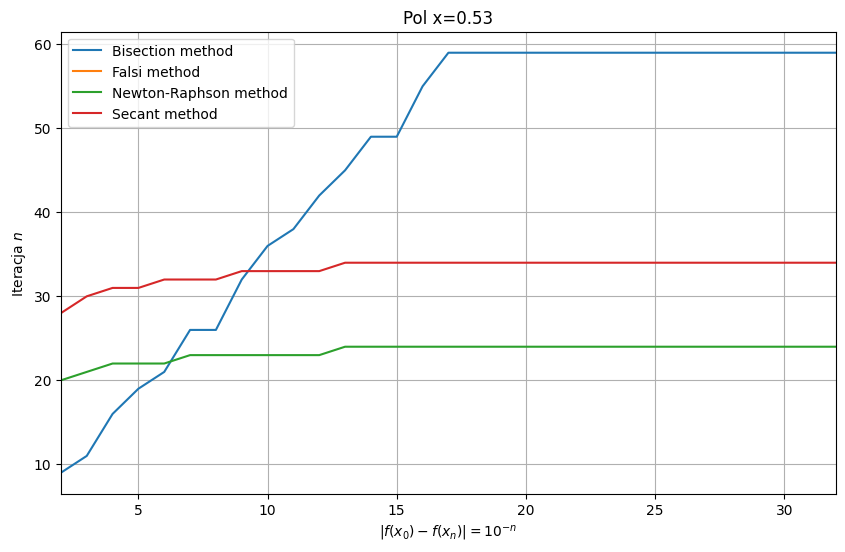

In [78]:
n = 32
errors = accuracy_till_zero(0, 100, n)
for name, errors in errors.items():
    plot_accuracy_till(errors, name, n)